In [1]:
import tensorflow as tf
import numpy as np

%matplotlib inline
import pylab

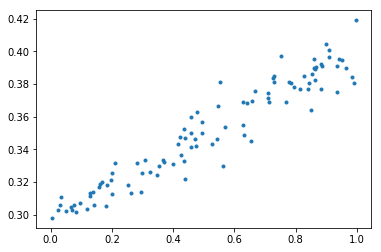

In [2]:
# Step 1: Obtain input data
# Generate synthetic data with Gaussian noise
x_data = np.random.rand(100).astype(np.float32)
noise = np.random.normal(scale=0.01, size=len(x_data)) #Scale is the SD of the normal distribution.
y_data = x_data * 0.1 + 0.3 + noise # assume linear source

pylab.plot(x_data, y_data, '.')

In [3]:
# Step 2: Build inference graph
W = tf.get_variable(name='W', initializer=tf.random_uniform([1], 0.0, 1.0))
b = tf.get_variable(name='b', initializer=tf.zeros([1]))
y = W * x_data + b

In [4]:
# print(W.name)
# print(b.name)

In [5]:
# Step 3: Build training graph
loss = tf.reduce_mean(tf.square(y-y_data)) # create an operation that calculate mean-squared loss.
optimizer = tf.train.AdadeltaOptimizer(learning_rate=0.5) # create an optimization operation.
train = optimizer.minimize(loss) # create a training operation
init = tf.global_variables_initializer() # create a variable initialization operator.

# Note that at this point we have only built the graph, none of the operations are executed.

In [6]:
# print(tf.get_default_graph().as_graph_def())

In [7]:
# Step 4: Create Session and launch graph
sess = tf.Session()
sess.run(init)
y_initial_values = sess.run(y)

In [8]:
# Step 5: Train the graph
for step in range(1001):
    sess.run(train)
    if step % 20 == 0:
        print(step, sess.run([W, b]))

0 [array([ 0.35673004], dtype=float32), array([  6.32454685e-05], dtype=float32)]
20 [array([ 0.35771519], dtype=float32), array([ 0.00105038], dtype=float32)]
40 [array([ 0.35868135], dtype=float32), array([ 0.00202252], dtype=float32)]
60 [array([ 0.35965362], dtype=float32), array([ 0.00300495], dtype=float32)]
80 [array([ 0.36063248], dtype=float32), array([ 0.00399826], dtype=float32)]
100 [array([ 0.36161757], dtype=float32), array([ 0.00500219], dtype=float32)]
120 [array([ 0.3626084], dtype=float32), array([ 0.00601632], dtype=float32)]
140 [array([ 0.36360449], dtype=float32), array([ 0.00704023], dtype=float32)]
160 [array([ 0.36460534], dtype=float32), array([ 0.00807347], dtype=float32)]
180 [array([ 0.36561036], dtype=float32), array([ 0.00911561], dtype=float32)]
200 [array([ 0.3666192], dtype=float32), array([ 0.01016623], dtype=float32)]
220 [array([ 0.36763126], dtype=float32), array([ 0.01122493], dtype=float32)]
240 [array([ 0.36864612], dtype=float32), array([ 0.012

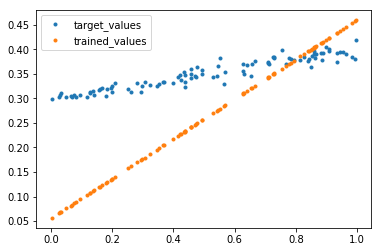

In [9]:
pylab.plot(x_data, y_data, '.', label="target_values")
# pylab.plot(x_data, y_initial_values, '.', label="initial_values")
pylab.plot(x_data, sess.run(y), '.', label="trained_values")
pylab.legend()
# pylab.ylim(0, 1.0)

In [11]:
writer = tf.summary.FileWriter('./my_graph', sess.graph)

In [12]:
writer.close()
sess.close()